# CNN Arabic Hand Written Degits Recognition

## Overview

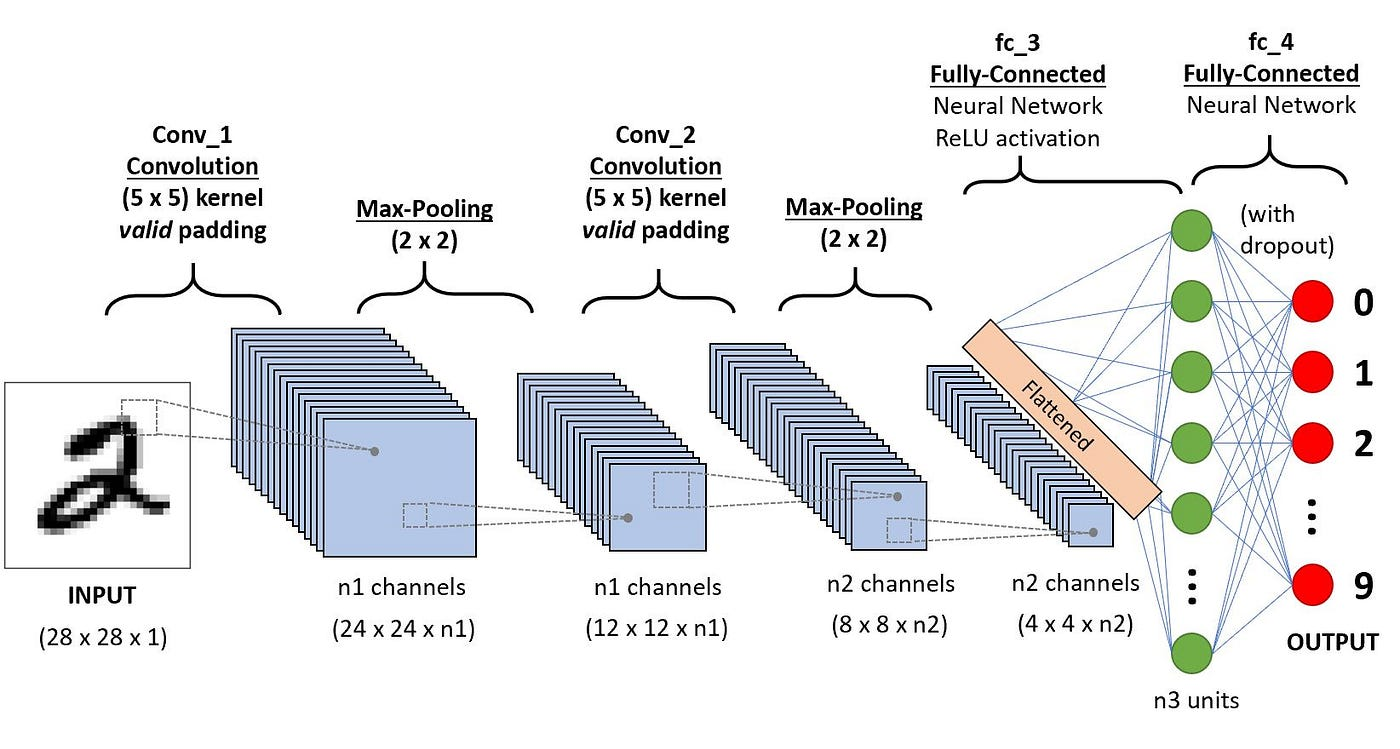
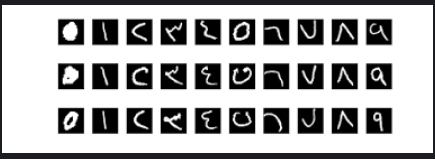

- https://www.kaggle.com/code/abdelwahed43/arabic-handwritten-digits-recognizer

## Implementation

### Libs

In [18]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

### Load & Prepare Data

In [22]:
def get_and_prepare_data():
    # load data
    X_train = pd.read_csv("datasets/csvTrainImages 60k x 784.csv").values
    Y_train = pd.read_csv("datasets/csvTrainLabel 60k x 1.csv").values
    X_test = pd.read_csv("datasets/csvTestImages 10k x 784.csv").values
    Y_test = pd.read_csv("datasets/csvTestLabel 10k x 1.csv").values
    # reshape to be [samples][pixels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # one hot encode outputs
    
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    num_classes = Y_test.shape[1]
    return (X_train, Y_train), (X_test, Y_test), num_classes

(X_train, y_train), (X_test, y_test), num_classes = get_and_prepare_data()

### Define Model Architecture - CNN (layers, activation functions, loss function, optimizer)

In [ ]:
def large_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = large_model()

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,254 (622.09 KB)

 Trainable params: 159,254 (622.09 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [ ]:
historylg= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 35s 109ms/step - accuracy: 0.9169 - loss: 0.3023 - val_accuracy: 0.9857 - val_loss: 0.0487
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.9917 - loss: 0.0287 - val_accuracy: 0.9857 - val_loss: 0.0477
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.9950 - loss: 0.0172 - val_accuracy: 0.9893 - val_loss: 0.0342
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.9957 - loss: 0.0145 - val_accuracy: 0.9891 - val_loss: 0.0370
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9889 - val_loss: 0.0474
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9898 - val_loss: 0.0417
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.9976 - loss: 0.0076 

In [26]:
# evaluate model
_ , acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 94.819


### Visualize Model Performance in Training (Train, Validation)

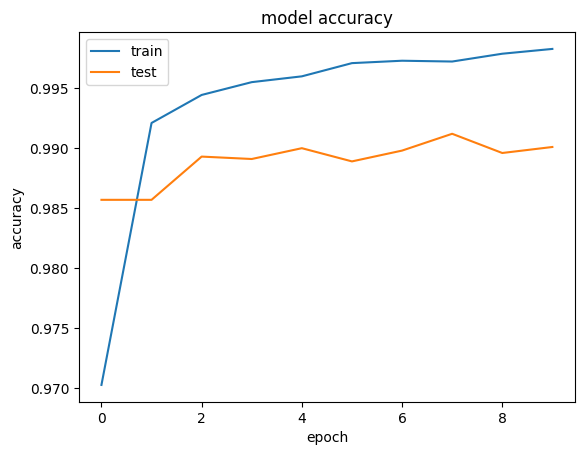

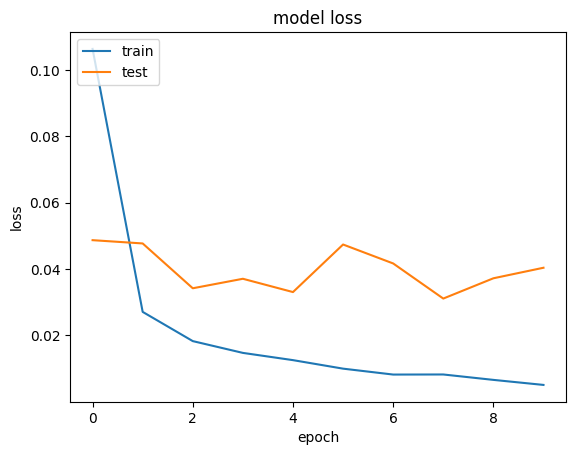

In [27]:
import matplotlib.pyplot as plt
plt.plot(historylg.history['accuracy'])
plt.plot(historylg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historylg.history['loss'])
plt.plot(historylg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Verify

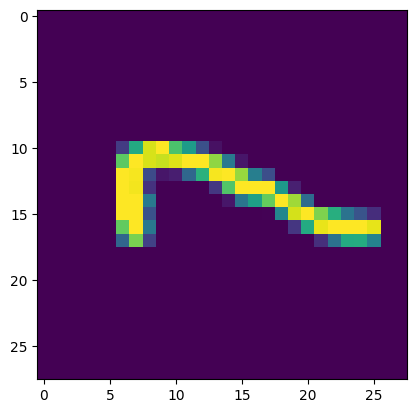

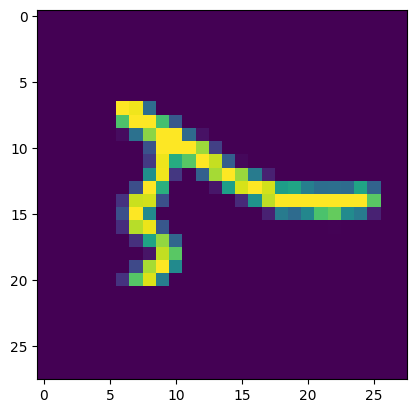

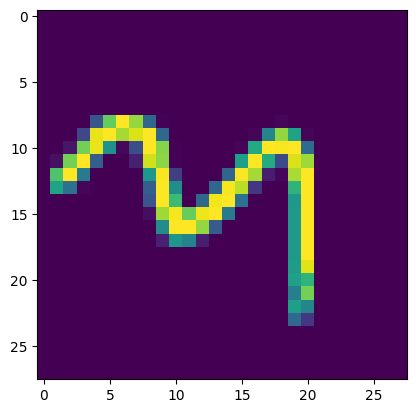

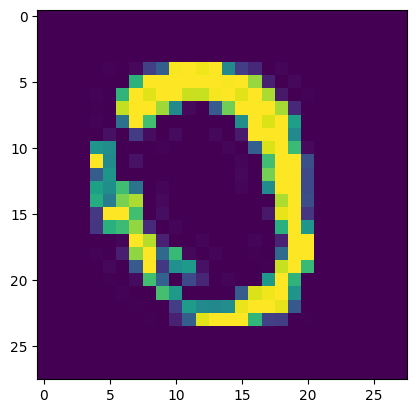

In [32]:
# A few random samples
use_samples = [1, 2, 3, 4]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((28, 28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])

In [33]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(4, 28, 28, 1)


In [34]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[[4.9242093e-03 2.0870009e-02 8.4571803e-01 5.1584370e-02 1.5950968e-02
  3.3153363e-03 1.5851377e-02 2.6571627e-03 8.0704354e-03 3.1058121e-02]
 [4.6049277e-03 7.1865129e-03 2.7517310e-01 6.8168223e-01 5.0421930e-03
  2.5350389e-03 9.7018462e-03 1.2660141e-02 4.5370564e-04 9.6040271e-04]
 [1.5382320e-02 1.6248539e-03 9.1602106e-04 6.2576088e-04 9.6226925e-01
  5.8728727e-03 2.8755942e-03 1.3601577e-03 6.5464601e-03 2.5266404e-03]
 [4.5474726e-03 5.7016796e-06 3.0425128e-03 2.4502701e-06 4.1015694e-04
  9.9127883e-01 7.7386139e-06 6.3588185e-04 3.3367029e-05 3.5882429e-05]]


In [35]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[2 3 4 5]
